In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

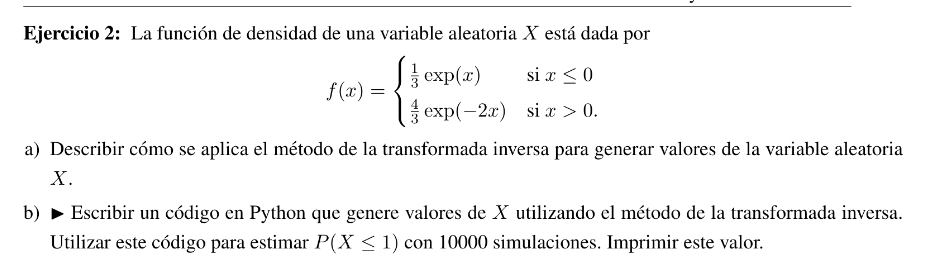

In [21]:
def F_inv(x):
    if 0 <= x < 1/3:
        return np.log(3*x)
    elif 1/3 <= x < 1:
        return -(np.log((3-3*x)/2)/2)

def F(x):
    if x <= 0:
        return 1/3 * np.exp(x)
    else:
        return 1-((2*np.exp(-2*x))/3)

def f(x):
    if x <= 0:
        return (1/3) * np.exp(x)
    else:
        return (4/3) * np.exp(-2*x)


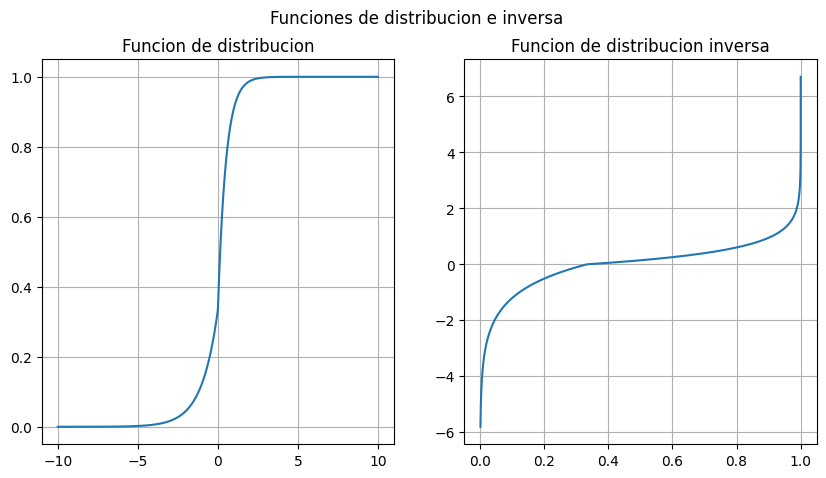

In [23]:
# grafico de la funcion de distribucion e inversa
x = np.linspace(-10,10,100000)
y = [F(i) for i in x]

x_inv = np.linspace(0.001,0.999999,100000)
y_inv = [F_inv(i) for i in x_inv]

# plot both graphs in different subplots
fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Funciones de distribucion e inversa')
axs[0].plot(x,y)
axs[0].set_title('Funcion de distribucion')
axs[0].grid()

axs[1].plot(x_inv,y_inv)
axs[1].set_title('Funcion de distribucion inversa')
axs[1].grid()
plt.show()


In [24]:
def tinversa():
    u = rd.random()
    return F_inv(u)

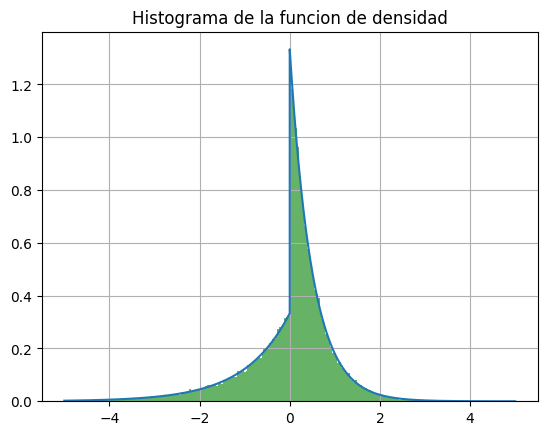

In [33]:
# comparo la funcion de densidad con un histograma del metodo tinversa
n = 100000
samples = [tinversa() for _ in range(n)]

x = np.linspace(-5,5,100000)
y = [f(i) for i in x]

plt.hist(samples, bins=256,range=(-5,5), density=True, alpha=0.6, color='g')
plt.plot(x,y)
plt.title('Histograma de la funcion de densidad')
plt.grid()
plt.show()

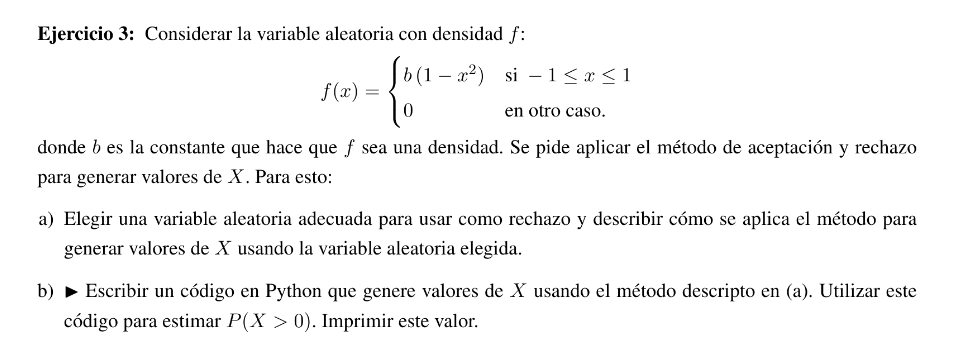

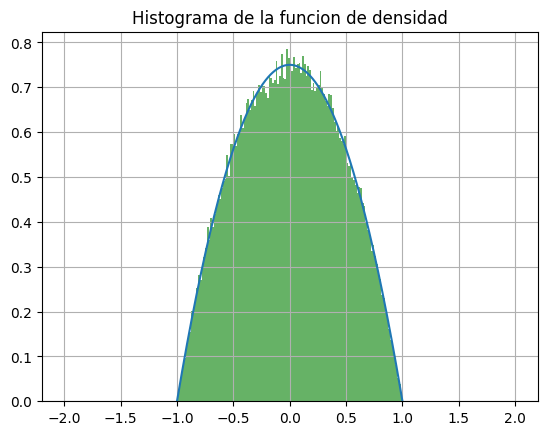

In [41]:
def f(x):
    if -1<=x<=1:
        return (3/4) *(1 - x**2)

def h(x):
    return (3/2) * (1 - x**2)

def arechazo():
    while True:
        y = rd.uniform(-1,1)
        u = rd.random()
        if u < h(y) * 1/(3/2):
            return y

# comparo la funcion de densidad con un histograma del metodo arechazo

n = 100000
samples = [arechazo() for _ in range(n)]

x = np.linspace(-1,1,100000)
y = [f(i) for i in x]

plt.hist(samples, bins=256,range=(-2,2), density=True, alpha=0.6, color='g')
plt.plot(x,y)
plt.title('Histograma de la funcion de densidad')
plt.grid()
plt.show()


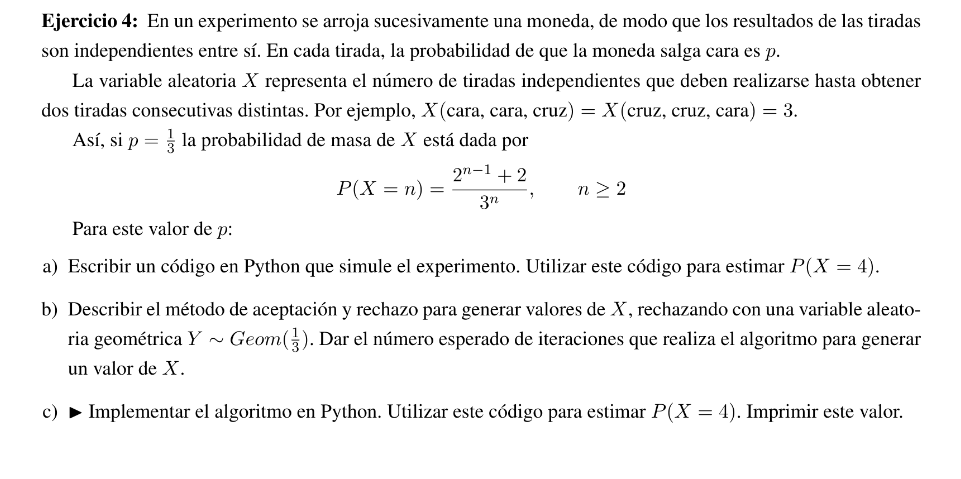

In [62]:
def p(x):
    return (2**(x-1)+2)/3**x
    
def experimento():
    t1 = rd.randint(0,1) # 0 es cara, 1 es cruz
    t2 = rd.randint(0,1)
    tiradas = [t1,t2]
    i = 0
    while tiradas[i] == tiradas[i+1]: # chequeo si las ultimas dos tiradas son iguales
        tiradas.append(rd.randint(0,1)) # tiro de vuelta
        i += 1
    return len(tiradas)

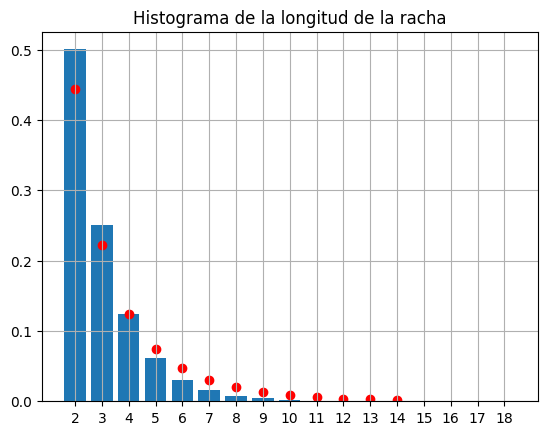

In [77]:
# grafico el hist del experimento
x = np.arange(2,15)
y = [p(i) for i in x]

n = 100000
samples = [experimento() for _ in range(n)]

valores, ocur = np.unique(samples, return_counts=True)
plt.bar(valores, ocur/n)
plt.scatter(x,y, color='r')
plt.xticks(valores)
plt.title('Histograma de la longitud de la racha')
plt.grid()
plt.show()


In [74]:
def p_x_igual_a_k(k, nsims):
    return sum([1 for _ in range(nsims) if experimento() == k])/nsims



probabilidad P(X = 4) estimada: 0.1225
Prob teoricamente: 0.12345679012345678


In [103]:
def gen_geometrica(p):    
    return int(np.log(1-rd.random())/np.log(1-p)) + 1

def q_j(x):
    return (2**(x-1))/3**x

def acept_rech_geom():
    c = 2
    it = 0
    while True:
        it += 1
        y = gen_geometrica(1/3)
        u = rd.random()
        if u <= p(y)/(q_j(y)*c) and y>=2:
            return y, it

In [107]:
def p_x_igual_a_k_arech(k, nsims):
    return sum([1 for _ in range(nsims) if acept_rech_geom()[0] == k])/nsims

print(f"probabilidad P(X = 4) estimada con exp: {p_x_igual_a_k(4, 10000)}")
print(f"probabilidad P(X = 4) estimada con arech: {p_x_igual_a_k_arech(4, 10000)}")
print(f"Prob teoricamente: {p(4)}")

probabilidad P(X = 4) estimada con exp: 0.1236
probabilidad P(X = 4) estimada con arech: 0.1229
Prob teoricamente: 0.12345679012345678


In [129]:
# calculo la media de iteraciones realizadas por el metodo de aceptacion rechazo
n = 10000
iteraciones = [acept_rech_geom()[1] for _ in range(n)]
print(f"Media de iteraciones: {np.mean(iteraciones)}")

Media de iteraciones: 2.009
